
Introduction :

L’industrie du jeu vidéo est l’un des secteurs les plus dynamiques et rentables du divertissement. Avec une croissance constante et une diversité de plateformes et de genres, comprendre les tendances du marché est essentiel pour les éditeurs, les développeurs et les investisseurs.

Dans cette analyse, nous explorons un ensemble de données provenant de VGChartz, une base de données reconnue pour le suivi des ventes de jeux vidéo à l’échelle mondiale. Notre objectif est d’identifier les facteurs influençant les ventes, de dégager des tendances clés et d’évaluer l’impact des plateformes et des genres sur le succès commercial des jeux.

Nous allons ainsi examiner :

La répartition des ventes par plateforme et par région
L’influence des notes des critiques sur les performances commerciales
Les genres les plus populaires et leur évolution au fil du temps
Les corrélations entre les différentes variables pour mieux comprendre les dynamiques du marché

Problématique: Quels sont les facteurs qui influencent le succès commercial et critique des jeux vidéo?


In [1]:
# Étape 1 : Chargement des données
import pandas as pd

# Chemin du fichier CSV
file_path = "vgchartz-2024.csv"

# Chargement des données
data = pd.read_csv(file_path)

# Étape 2 : Exploration des données
print("Aperçu des premières lignes du dataset :")
print(data.head())

print("\nInformations générales sur le dataset :")
print(data.info())

# Étape 3 : Nettoyage des données
# Correction du format de la date
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Création d'une colonne "release_year" pour extraire l'année de sortie
data['release_year'] = data['release_date'].dt.year


# Suppression des colonnes inutiles (image, dernière mise à jour)
columns_to_drop = ['img', 'last_update']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Étape 4 : Vérification des modifications
print("\nAperçu des données après nettoyage :")
print(data.head())

print("\nInformations après nettoyage :")
print(data.info())


Aperçu des premières lignes du dataset :
                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1   

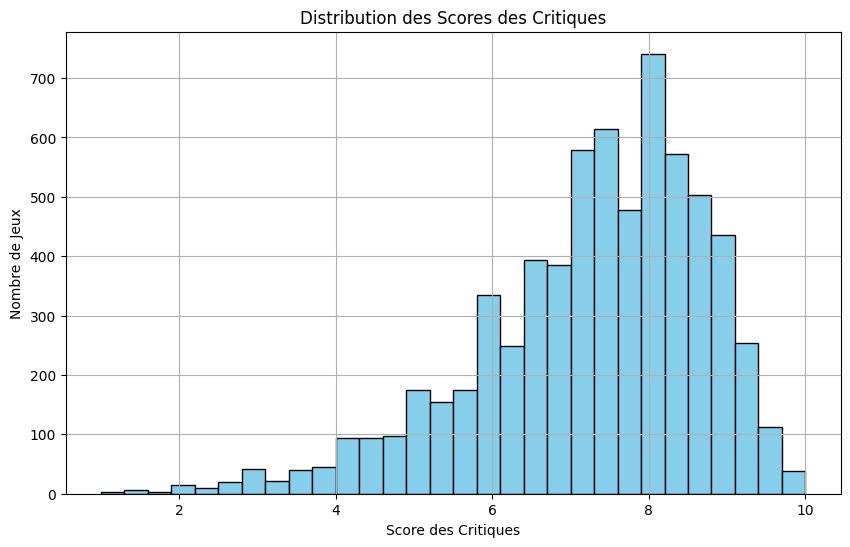

In [ ]:
import matplotlib.pyplot as plt

# Distribution des scores des critiques
plt.figure(figsize=(10, 6))
plt.hist(data['critic_score'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des Scores des Critiques')
plt.xlabel('Score des Critiques')
plt.ylabel('Nombre de Jeux')
plt.grid(True)
plt.show()




Description du graphique :
Un histogramme montre la répartition des scores critiques obtenus par les jeux. L’axe des abscisses représente les scores (sur une échelle de 0 à 10), et l’axe des ordonnées indique le nombre de jeux ayant obtenu chaque score.
Ce graphique permet d’observer si la majorité des jeux sont bien notés ou s’il existe de fortes disparités. Une concentration des scores élevés pourrait indiquer une tendance générale à une bonne qualité perçue.

Analyse et Signification :
 Observations : La distribution est fortement biaisée vers des scores élevés, avec la majorité des jeux notés entre 7 et 10.
    - Cela suggère que, dans l’ensemble, les jeux du dataset bénéficient d’une bonne réception critique. Toutefois, la présence de quelques scores faibles ou manquants indique que certains titres sont moins bien perçus.

Lien avec la problématique : La qualité perçue (mesurée par les scores critiques) semble être globalement élevée et constitue un facteur potentiellement positif pour le succès commercial, même s’il ne suffit pas à lui seul à garantir de fortes ventes.

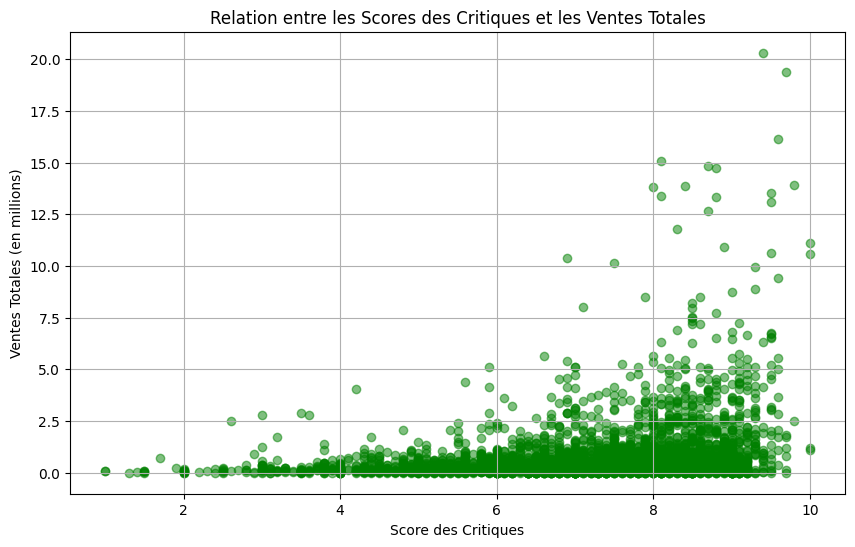

In [ ]:
# Relation entre les scores des critiques et les ventes totales
plt.figure(figsize=(10, 6))
plt.scatter(data['critic_score'], data['total_sales'], alpha=0.5, color='green')
plt.title('Relation entre les Scores des Critiques et les Ventes Totales')
plt.xlabel('Score des Critiques')
plt.ylabel('Ventes Totales (en millions)')
plt.grid(True)
plt.show()


Description de graphique :
Il s'agit d'un nuage de points (scatter plot) qui représente la relation entre le score critique des jeux (axe des abscisses) et leurs ventes totales en millions (axe des ordonnées).
-Chaque point du graphique correspond à un jeu individuel, avec une transparence (alpha=0.5) qui aide à visualiser la densité des points en cas de chevauchement.

Analyse et Signification :

Il semble qu'il y ait une tendance à ce que les jeux avec des scores de critiques plus élevés aient tendance à générer des ventes plus élevées, mais il existe également beaucoup de dispersion. Certains jeux ayant de faibles scores de critiques réussissent à obtenir de bonnes ventes, tandis que d'autres avec des critiques élevées ne génèrent pas nécessairement de grandes ventes. Cette dispersion suggère que, même si la qualité critique est un facteur important, d’autres variables influencent également les ventes.

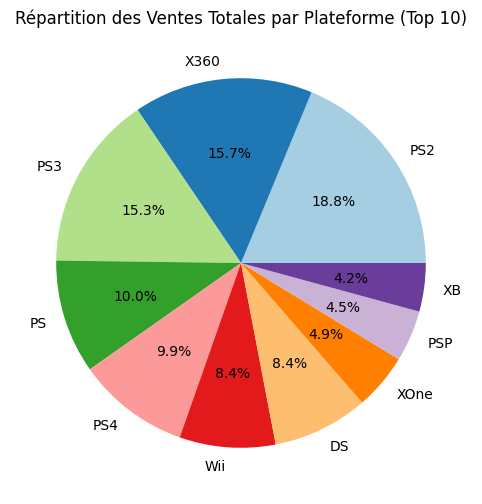

In [3]:
# Top 10 des plateformes avec les meilleures ventes totales
import matplotlib.pyplot as plt

top_10_platforms_sales = data.groupby('console')['total_sales'].sum().sort_values(ascending=False).head(10)


# Affichage sous forme de diagramme circulaire (pie chart)
plt.figure(figsize=(10, 6))
plt.pie(top_10_platforms_sales, labels=top_10_platforms_sales.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Répartition des Ventes Totales par Plateforme (Top 10)')
plt.show()


Description du graphique :
Le graphique présenté est un diagramme circulaire représentant la répartition des ventes totales des 10 meilleures plateformes de jeux vidéo. Chaque segment du diagramme correspond à une console et montre son pourcentage des ventes totales par rapport aux autres plateformes du classement.

 Analyse et Signification
La PlayStation 2 (PS2) domine les ventes avec environ 18,8% des ventes totales. Cela confirme son énorme succès commercial, soutenu par une large ludothèque et une longue durée de vie.
La Xbox 360 et la PlayStation 3 (PS3) suivent de près, avec respectivement 15,7% et 15,3% des ventes totales. Ces consoles de la même génération ont bénéficié de jeux populaires et d'une forte adoption par les joueurs.
La PlayStation (PS1) occupe 10%, preuve de son impact historique sur l'industrie du jeu vidéo.
Les autres plateformes, comme la Wii (8,4%), la Nintendo DS (8,4%), et la PS4 (9,9%), montrent également une présence significative mais légèrement en retrait par rapport aux leaders du marché.

Ce graphique permet d'illustrer quelles plateformes ont eu le plus grand impact commercial dans l'histoire du jeu vidéo. On observe que Sony et Microsoft dominent largement le marché avec leurs consoles PlayStation et Xbox. Nintendo, bien qu'en retrait, parvient à se maintenir grâce à ses consoles innovantes comme la Wii et la DS.

En conclusion, ce graphe met en évidence l'importance de certaines consoles dans l'industrie vidéoludique et permet d’identifier les tendances qui ont marqué le marché du jeu vidéo.


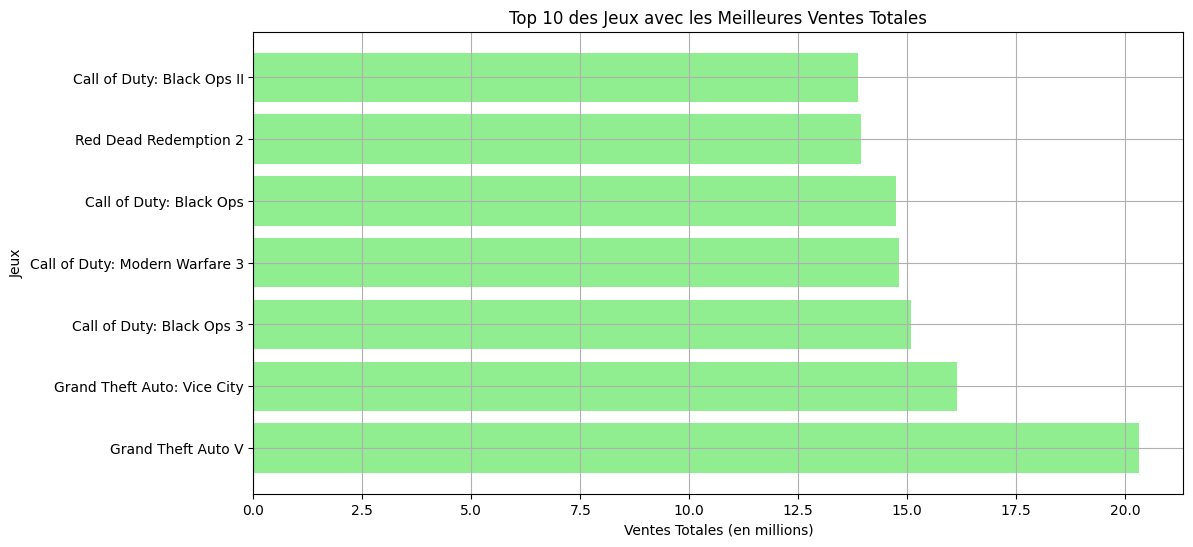

In [ ]:
# Top 10 des jeux avec les meilleures ventes et les meilleures critiques
top_10_sales = data[['title', 'total_sales', 'critic_score']].sort_values(by='total_sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_sales['title'], top_10_sales['total_sales'], color='lightgreen')
plt.title('Top 10 des Jeux avec les Meilleures Ventes Totales')
plt.xlabel('Ventes Totales (en millions)')
plt.ylabel('Jeux')
plt.grid(True)
plt.show()




Description de graphique :
Il s’agit d’un diagramme en barres horizontal qui classe les 10 jeux ayant généré le plus grand volume de ventes totales, exprimées en millions d’unités.  
Axe des Abscisses (X) : Représente les ventes totales en millions d’unités. La longueur de chaque barre est proportionnelle au volume de ventes, facilitant la comparaison entre les jeux.
Axe des Ordonnées (Y) : Liste les titres des jeux. La disposition horizontale permet une lecture aisée des noms, surtout lorsque ceux-ci sont longs ou comprennent des sous-titres.

Analyse et Signification :
On remarque que quelques jeux se démarquent nettement avec des ventes très élevées par rapport aux autres.
La différence entre le top du classement et les jeux suivants indique une forte concentration du succès commercial.



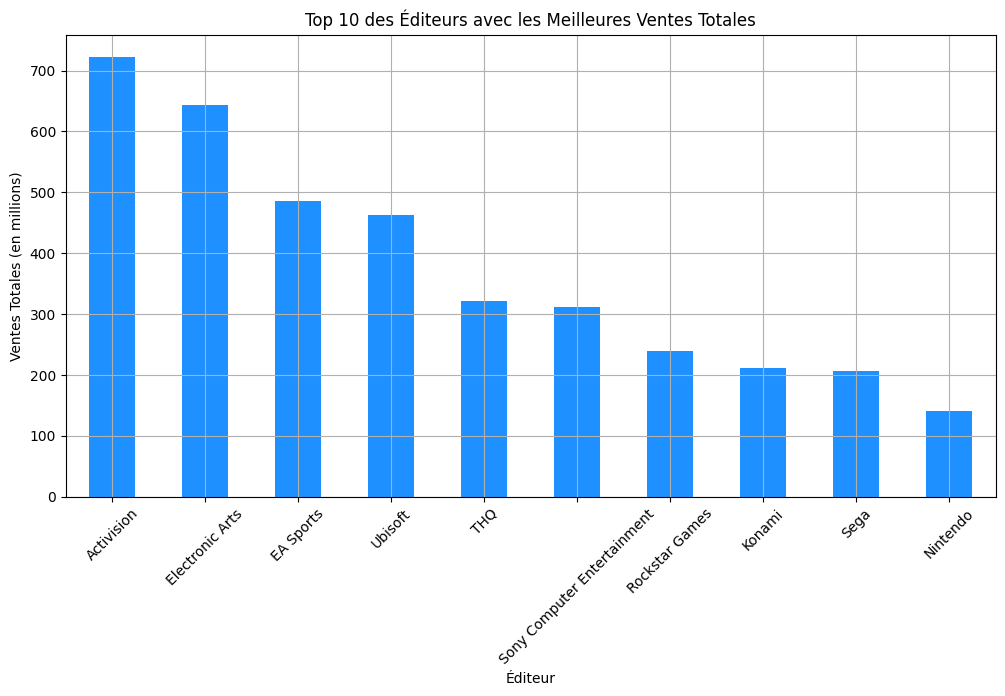

In [ ]:

# Top 10 des éditeurs avec les meilleures ventes totales
top_10_publishers_sales = data.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10)

# Affichage du graphique
plt.figure(figsize=(12, 6))
top_10_publishers_sales.plot(kind='bar', color='dodgerblue')
plt.title('Top 10 des Éditeurs avec les Meilleures Ventes Totales')
plt.xlabel('Éditeur')
plt.ylabel('Ventes Totales (en millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Description de graphique :
Diagramme en barres verticales.
L’axe des abscisses représente les éditeurs de jeux vidéo.
L’axe des ordonnées indique la somme des ventes totales (en millions d’unités) réalisées par chaque éditeur.

Analyse et Segnification :

Le graphique montre clairement que quelques éditeurs dominent largement le marché avec des volumes de ventes significativement supérieurs aux autres.
La disparité dans la hauteur des barres indique une concentration forte du succès commercial chez certains acteurs majeurs.

Les éditeurs comme Activision, Electronic Arts et Rockstar Games figurent parmi les plus performants en termes de ventes.

Ces éditeurs possèdent des franchises extrêmement populaires qui leur permettent de dominer le marché.
L'analyse montre que les grands éditeurs ont un avantage stratégique grâce à des budgets marketing élevés et des licences populaires.

Ce graphique met en lumière le rôle déterminant de l’éditeur dans le succès commercial. En effet, un éditeur bien établi avec une stratégie de distribution efficace et une forte notoriété peut largement influencer les ventes, même lorsque la qualité critique des jeux varie.
En conclusion, le graphique révèle que l’éditeur constitue un levier majeur dans l’atteinte d’un succès commercial significatif.

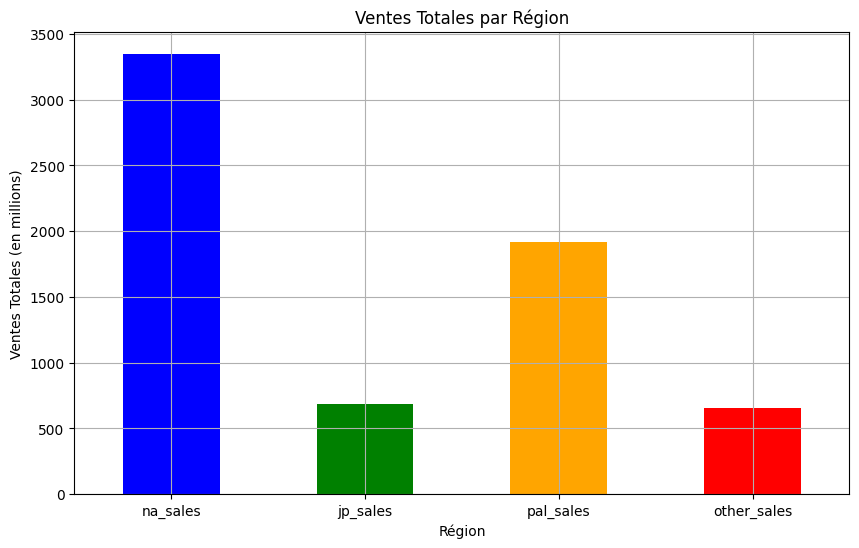

In [ ]:
# Ventes par région
region_sales = data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Ventes Totales par Région')
plt.xlabel('Région')
plt.ylabel('Ventes Totales (en millions)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


Description de graphique :
Diagramme en barres simple.
Axes :
L’axe des abscisses représente les différentes régions de vente (Amérique du Nord, Japon, Europe/PAL, et Autres).
L’axe des ordonnées indique les ventes totales, exprimées en millions d’unités, agrégées pour chaque région.
Présentation :
Chaque barre, de couleur distincte (par exemple, bleu pour NA, vert pour JP, orange pour PAL, et rouge pour Autres), illustre la contribution respective de chaque région aux ventes globales.
Le graphique est muni d’un titre clair et d’étiquettes pour faciliter la lecture et la comparaison des volumes de ventes entre les régions.
2. Analyse et Signification
Analyse Visuelle :
Le graphique met en évidence que certaines régions, comme l’Amérique du Nord, affichent des barres beaucoup plus élevées que les autres, indiquant des ventes nettement supérieures.
Les écarts entre les hauteurs des barres traduisent une disparité marquée entre les différents marchés.
Signification :
Importance du Marché Régional : La dominance d’une région, typiquement l’Amérique du Nord, suggère que ce marché est particulièrement crucial pour le succès commercial des jeux vidéo.
Stratégies Localisées : Les différences régionales indiquent que les facteurs influençant le succès commercial peuvent varier selon les cultures, préférences des consommateurs et stratégies de distribution locales.
Impact sur le Succès Global : La performance dans une région clé peut fortement impacter le total des ventes, même si d’autres régions contribuent de manière plus modérée.
3. Lien avec le Problème et Conclusion
Lien avec la Problématique :
Ce graphique démontre que le succès commercial dépend aussi de la capacité des jeux à s’adapter aux spécificités régionales. Les stratégies de marketing, la distribution et l’adaptation culturelle jouent un rôle déterminant pour conquérir un marché particulier.
Conclusion :
En résumé, le graphique sur les ventes totales par région confirme que le succès commercial est multifactoriel et fortement influencé par le contexte régional.
L’Amérique du Nord, en particulier, se révèle être un marché majeur, ce qui implique que pour maximiser les ventes, une attention particulière doit être portée aux stratégies de pénétration et d’adaptation locale.
Cette observation renforce l’idée que, au-delà de la qualité critique, des facteurs externes comme la localisation et les stratégies de distribution régionales sont essentiels pour expliquer les performances commerciales des jeux vidéo.

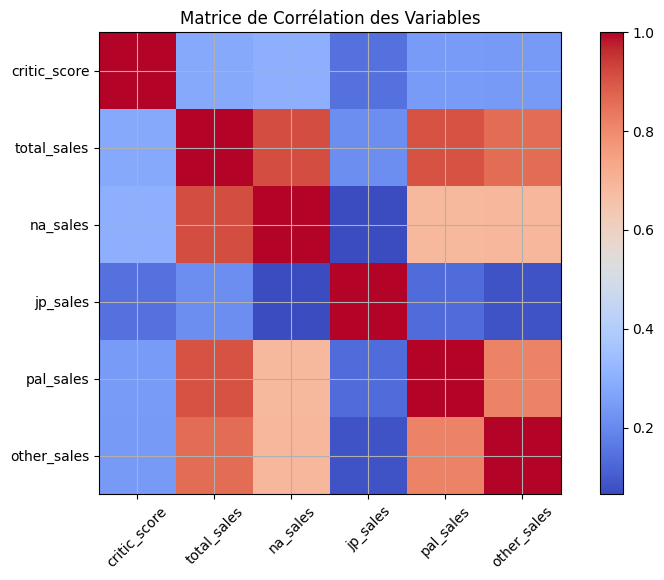

In [ ]:
# Calcul des corrélations
correlation_matrix = data[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matrice de Corrélation des Variables')
plt.grid(True)
plt.show()


Description du Graphique
Type de graphique :
Carte de chaleur (heatmap) générée à partir d'une matrice de corrélation.
Axes :
L'axe des abscisses et l'axe des ordonnées représentent les variables sélectionnées : score des critiques, ventes totales, ventes en Amérique du Nord, ventes au Japon, ventes en Europe (PAL) et ventes dans d'autres régions.
Présentation :
Les valeurs de corrélation sont affichées sous forme de couleurs, avec une palette « coolwarm » qui va du bleu (corrélations négatives) au rouge (corrélations positives).
Une barre de couleur (colorbar) indique l'échelle de corrélation.
Les étiquettes sur les axes facilitent l'interprétation des relations entre les différentes variables.
2. Analyse et Signification

Corrélations les plus fortes :

total_sales et na_sales apparaissent en rouge vif, suggérant une corrélation très élevée (proche de 1). Autrement dit, plus les ventes en Amérique du Nord sont importantes, plus les ventes totales ont tendance à être élevées.
total_sales et pal_sales (Europe/PAL) présentent également une corrélation forte, indiquant que ces deux marchés contribuent significativement au succès global d’un jeu.
Rôle du Score Critique :

critic_score et total_sales montrent une corrélation modérée à relativement élevée (couleur rouge plus clair), laissant penser qu’un bon score critique accompagne souvent de bonnes ventes, même si ce n’est pas le seul déterminant.
En revanche, la corrélation entre critic_score et jp_sales est plus faible (teinte plus orangée), révélant que le marché japonais peut parfois se montrer moins sensible aux notes critiques internationales ou avoir des préférences culturelles différentes.

-On observe un faible voire légèrement négatif lien entre na_sales et jp_sales (couleur plus bleutée), suggérant que les jeux qui fonctionnent très bien en Amérique du Nord ne sont pas forcément des succès au Japon, et vice versa.
Les ventes en Europe/PAL (pal_sales) et dans le reste du monde (other_sales) affichent, quant à elles, une corrélation modérée à forte avec les ventes totales, soulignant l’importance de ces marchés pour renforcer le succès global.

Synthèse de la Carte de Chaleur :

Les ventes régionales sont, sans surprise, fortement liées à total_sales. Parmi ces régions, l’Amérique du Nord et l’Europe/PAL jouent un rôle particulièrement déterminant.
Le score critique est positivement corrélé aux ventes, mais de manière moins marquée que l’influence du marché nord-américain ou européen, laissant entendre qu’un jeu peut se vendre très bien même s’il n’est pas unanimement acclamé par la critique, ou inversement.
3. Lien avec la Problématique et Conclusion
Lien avec la Problématique :

Problématique : 
Cette matrice montre clairement que si le score critique contribue à expliquer les ventes, la dimension régionale demeure essentielle. L’Amérique du Nord et l’Europe/PAL, en particulier, sont fortement liées aux ventes totales, tandis que le Japon présente un comportement plus indépendant.

Le succès commercial d’un jeu est donc le fruit d’une combinaison de facteurs :
La qualité perçue (score critique), qui exerce une influence positive.
La force des marchés régionaux, surtout en Amérique du Nord et en Europe/PAL, qui peut largement faire pencher la balance.
Les spécificités culturelles, illustrées par la faible corrélation entre le marché japonais et nord-américain, qui montrent l’importance de stratégies adaptées.
En définitive, la carte de chaleur confirme que le succès d’un jeu vidéo ne repose pas uniquement sur un score critique élevé : il résulte aussi de la capacité à performer sur les principaux marchés internationaux, renforçant ainsi la nature profondément multifactorielle du succès dans l’industrie vidéoludique.

Conclusion :
Pour conclure l'analyse montre que plusieurs facteurs interagissent pour influencer le succès commercial et critique d’un jeu vidéo :



Les scores des critiques sont positivement corrélés avec les ventes totales, bien que d'autres facteurs, comme la popularité de l'éditeur et de la plateforme, jouent un rôle important.

Les genres comme Action, Shooter sont associés à de bonnes performances commerciales et critiques.

Les éditeurs comme Activision et Rockstar Games sont des acteurs clés du marché, avec des scores élevés et des ventes massives.

Les ventes par région révèlent que l'Amérique du Nord et la région PAL dominent les ventes, tandis que le Japon et d'autres régions sont moins influentes.

Les plateformes telles que la PS4 et la PS3 ont enregistré les meilleures performances en termes de ventes et de critiques.

Ainsi, pour maximiser le succès d’un jeu, il est essentiel d’avoir une forte présence sur les plateformes populaires, un éditeur reconnu, un genre apprécié par le public, et une bonne réception critique.

Ces résultats peuvent être utiles pour les développeurs et les éditeurs cherchant à comprendre les facteurs influençant le succès des jeux vidéo et à ajuster leurs stratégies de développement et de marketing en conséquence.